# Exercise: Building a light curve from two different sectors.

## Goal

Some targets in TESS will have data in multiple sectors. These targets can be combined using lightkurve into one data set, and then analyzed together. In this exercise, you'll combine the data from sectors 1 and 4 for *Pi Mensae c* and improve the signal to noise of the transit detection. 

### Merging two light curves from two sectors.

In our previous exercise we created different apertures using light curve. Use the same methods to create download TPFs plot two aperture masks.

In [9]:
import lightkurve as lk

tpfs = lk.search_targetpixelfile('Pi Mensae').download_all()

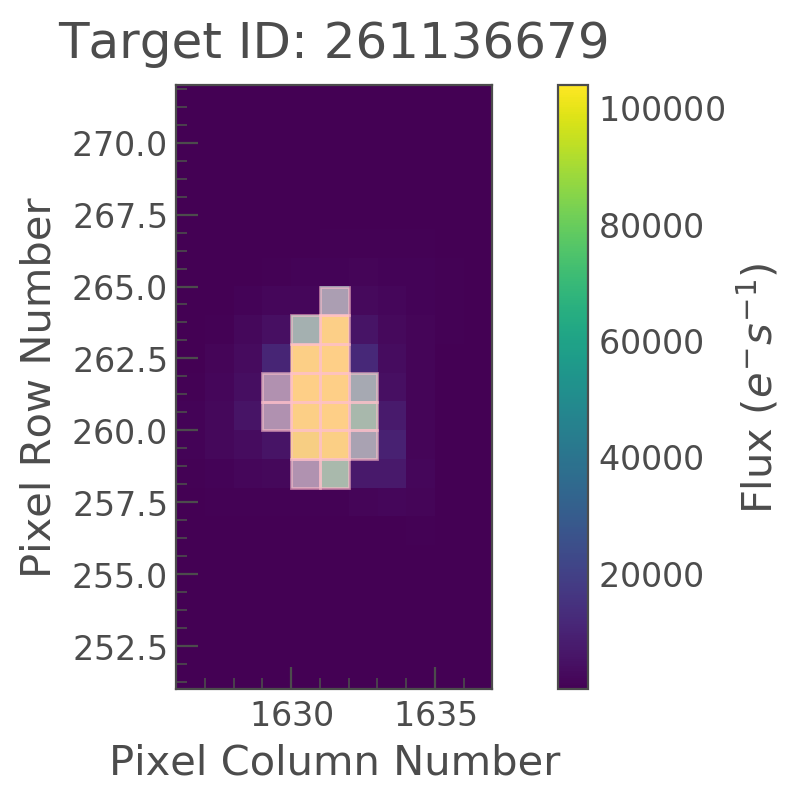

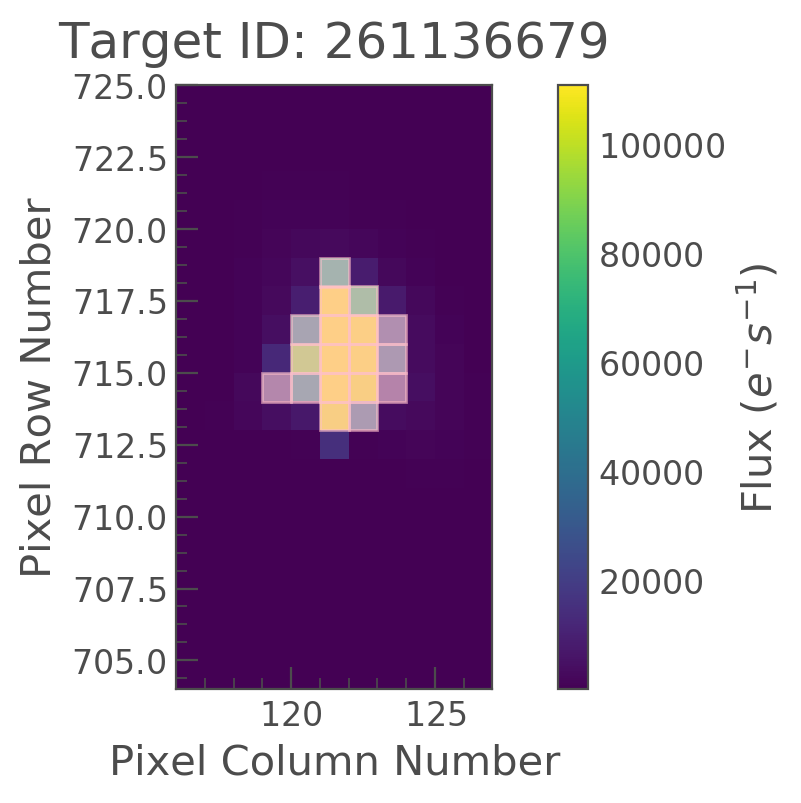

In [13]:
for tpf in tpfs:
    aper = tpf.create_threshold_mask(50)
    tpf.plot(aperture_mask=aper)

**Note:** The two tpfs have slightly different PSF shapes, due to being on different parts of the detector, at different seasons, with different scattered light. If you plot the TPFs you will see that you cannot simply reuse the same aperture for different sectors.

Create light curves from each TPF, using the `to_lightcurve` method.

In [31]:
aper = tpfs[0].create_threshold_mask(50)
lc1 = tpfs[0].to_lightcurve(aperture_mask=aper)

aper = tpfs[1].create_threshold_mask(50)
lc2 = tpfs[1].to_lightcurve(aperture_mask=aper)

Use the `lc.append()` method to create a new `LightCurve` object from the two separate sectors. The syntax here is

```python
new_lc = lc1.append(lc2)
```

**Note:** Be careful to use the `normalize()` method on each light curve, in order to set the median flux of each light curve to 1. Otherwise, you will end up with two sectors with a slight offset in flux.

In [32]:
lc = lc1.normalize().append(lc2.normalize())

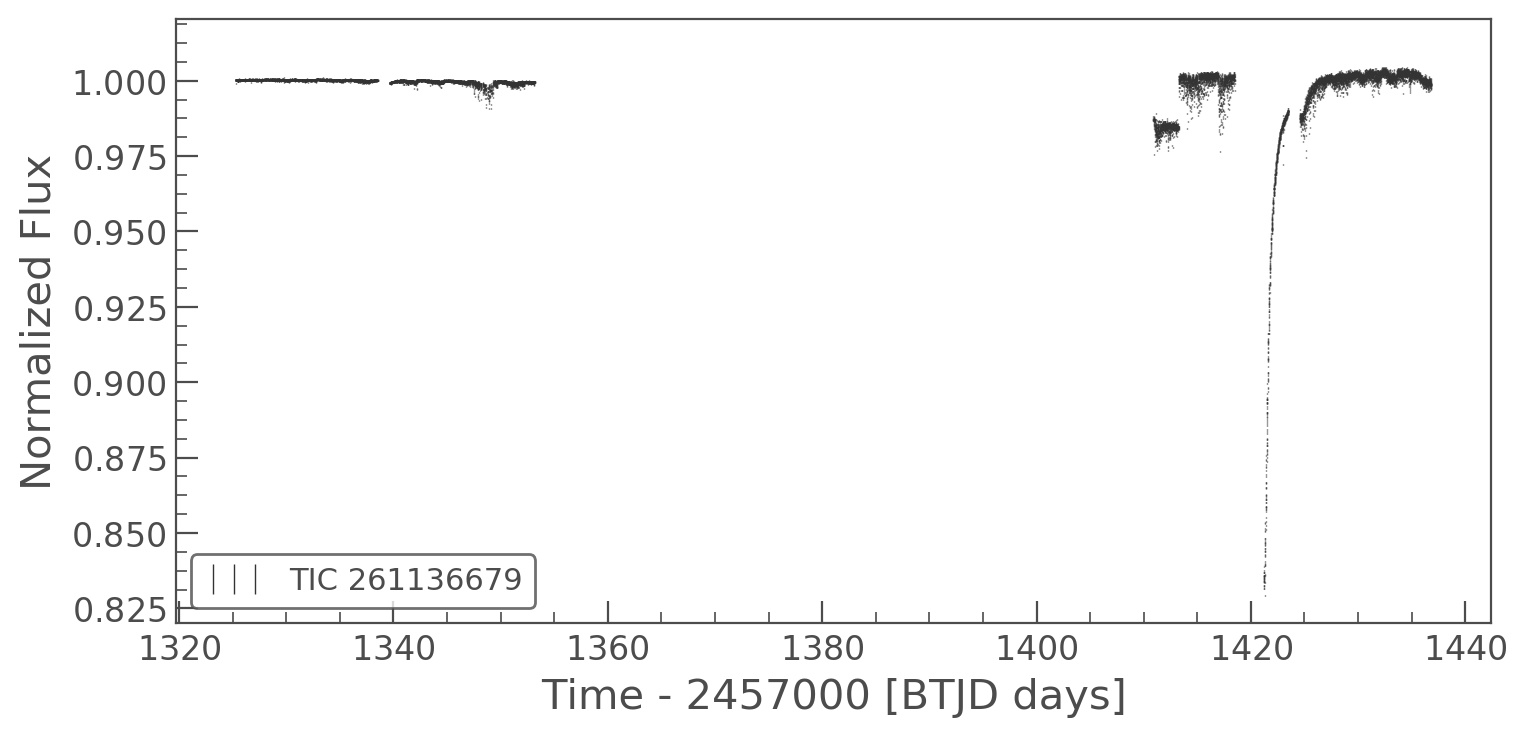

In [34]:
lc.errorbar()

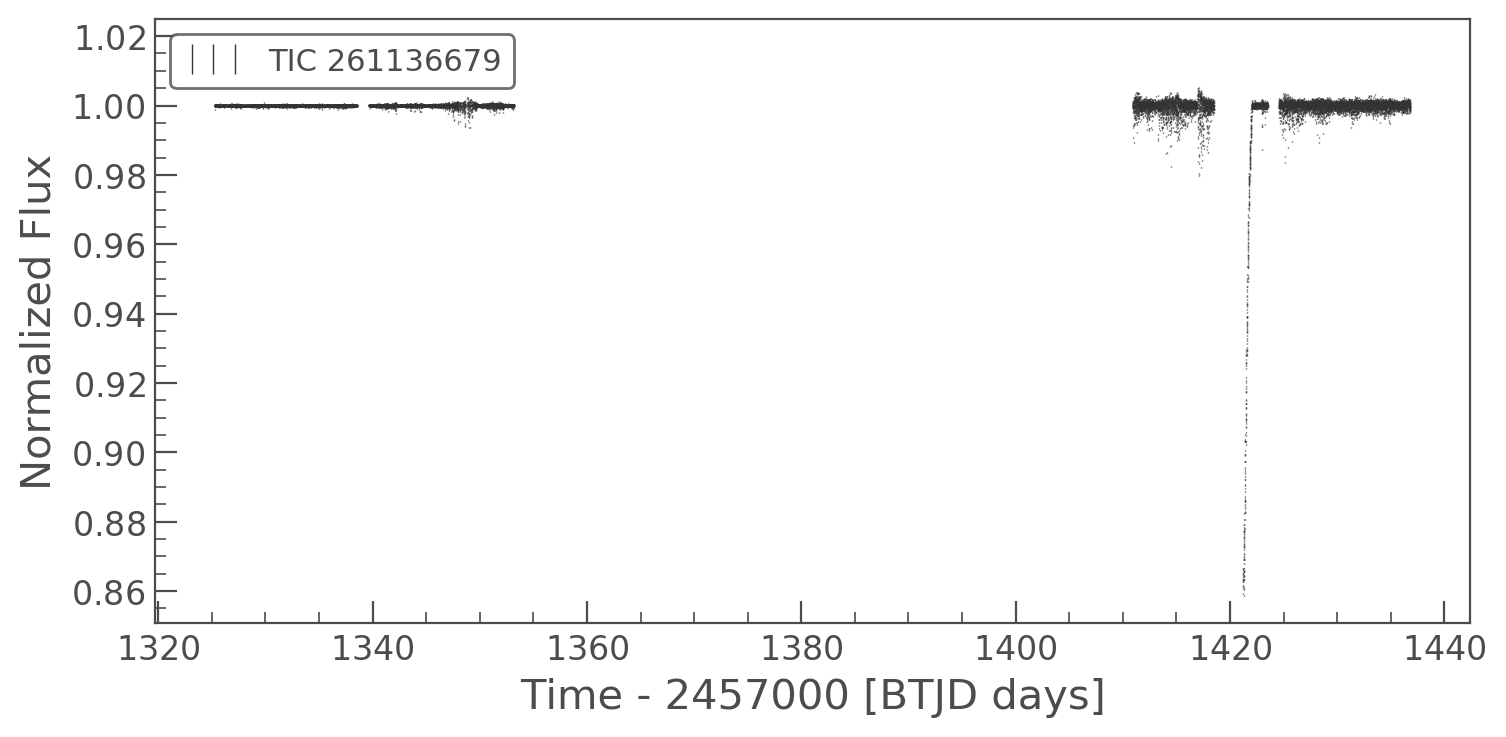

In [37]:
lc.flatten(201, break_tolerance=10).errorbar()